#### import libs

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

#### list files

In [2]:
from os import listdir
from os.path import isfile, join

# create path to input
mypath = "../DataSets/Mercedes"

# get all files
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# remove readme
list(filter(lambda a: a != 'README', onlyfiles))

# create paths
testPath = mypath + "/test.csv"
trainPath = mypath + "/train.csv"

#### load data

In [3]:
train_df = pd.read_csv(trainPath)
test_df = pd.read_csv(testPath)

##### check out train csv

In [4]:
train_df.shape

(4209, 378)

In [5]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

#### check out the target value

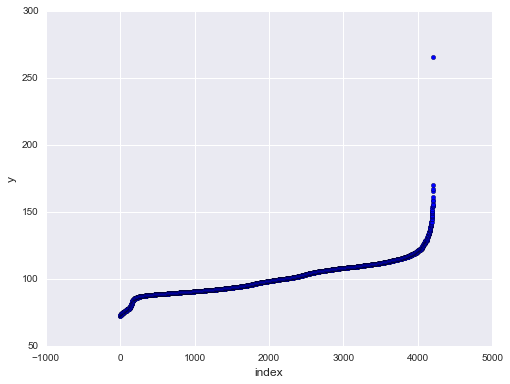

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

#### remove outliers (or maybe dont?!)

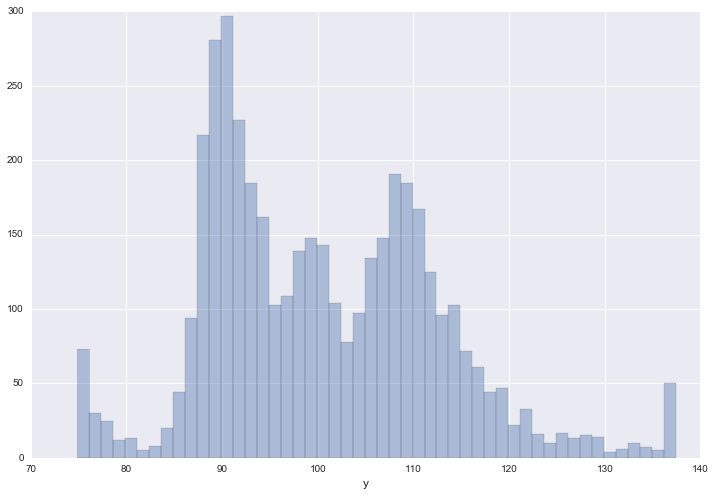

In [6]:
ulimit = np.percentile(train_df.y.values, 99)
llimit = np.percentile(train_df.y.values, 1)
train_df['y'].ix[train_df['y']>ulimit] = ulimit
train_df['y'].ix[train_df['y']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y', fontsize=12)
plt.show()

#### are there any NaNs?

In [8]:
nan_df = train_df.isnull().sum(axis=0).reset_index()
nan_df.columns = ['Feature', 'NaNs']
nan_df.ix[nan_df['NaNs']>0]

,Feature,NaNs


### transform categorical data to dummy variables
#### take test data as well and stack them before getting the dummies out

In [7]:
# remember size of train_df
train_shape = train_df.shape
# concat train and test
main_df = pd.concat([train_df, test_df])
# get dummies
main_df = pd.get_dummies(main_df, drop_first=True)
# split the stuff again
train_df, test_df = main_df[:train_shape[0]], main_df[train_shape[0]:]

#### drop unimportant columns

In [8]:
train_df = train_df.drop('ID', axis=1)

#### define input variables

In [9]:
y = train_df['y']
X = train_df.drop('y', axis=1)

#### split in training and cv set

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=0)

d:\programmieren\python\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### setup ml model

In [12]:
from sklearn.neural_network import MLPRegressor
meepo = MLPRegressor(\
                     hidden_layer_sizes=((train_df.shape[1]*2), (train_df.shape[1]*2)),\
                     activation='tanh',\
                     max_iter=10000,\
                     verbose=True,\
                     learning_rate_init=0.0001\
                    )

In [13]:
meepo.fit(X_train, y_train)

Iteration 1, loss = 4293.78235448
Iteration 2, loss = 2658.20196122
Iteration 3, loss = 1775.88097425
Iteration 4, loss = 1480.46431991
Iteration 5, loss = 1324.83762973
Iteration 6, loss = 1204.39446031
Iteration 7, loss = 1100.27295220
Iteration 8, loss = 1007.23126243
Iteration 9, loss = 922.61801568
Iteration 10, loss = 845.25685601
Iteration 11, loss = 774.22434491
Iteration 12, loss = 709.09728150
Iteration 13, loss = 649.09845544
Iteration 14, loss = 594.00217017
Iteration 15, loss = 543.40328631
Iteration 16, loss = 496.93178004
Iteration 17, loss = 454.26795602
Iteration 18, loss = 415.31884032
Iteration 19, loss = 379.61226963
Iteration 20, loss = 347.23696761
Iteration 21, loss = 317.54748765
Iteration 22, loss = 290.68940968
Iteration 23, loss = 266.33496760
Iteration 24, loss = 244.27913799
Iteration 25, loss = 224.36181642
Iteration 26, loss = 206.42093412
Iteration 27, loss = 190.38907922
Iteration 28, loss = 175.88111389
Iteration 29, loss = 163.01817682
Iteration 30, l

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1144, 1144), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

### work the test data

In [14]:
test_id = test_df.ix[:, ['ID']]

In [15]:
test_df = test_df.drop(['y', 'ID'], axis=1)

#### predict stuff

In [16]:
y_pred = meepo.predict(test_df)

#### merge stuff and pack everything into output.

In [17]:
y_pred = pd.Series(y_pred)
result = pd.concat([test_id, y_pred], axis=1, ignore_index=True)
result.columns = ['ID', 'y']

In [18]:
result

,ID,y
0,1,78.779238
1,2,97.005084
2,3,82.951290
3,4,76.834504
4,5,111.828176
5,8,92.351423
6,10,108.171507
7,11,92.141493
8,12,115.111074
9,14,93.145443


#### store result as csv

In [19]:
result.to_csv('results2.csv', index=False)